In [2]:

%tensorflow_version 2.x


UsageError: Line magic function `%tensorflow_version` not found.


In [4]:

import tensorflow as tf
import numpy as np


In [5]:

x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))


In [6]:

model_layers = [ 
    tf.keras.layers.Conv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),

]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 92, 92, 128)       3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 88, 128)       409728    
_________________________________________________________________
batch_normalization (BatchNo (None, 88, 88, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 84, 128)       409728    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 128)       409728    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 76, 76, 128)       409728    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       4

In [7]:
x_train.shape

(1498, 96, 96, 1)

In [8]:

model.fit( x_train , y_train , epochs=150 , batch_size=50 , validation_data=( x_test , y_test ) )


Train on 1498 samples, validate on 642 samples
Epoch 1/150
1498/1498 [==============================] - 62s 42ms/sample - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 2/150
1498/1498 [==============================] - 17s 12ms/sample - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 3/150
1498/1498 [==============================] - 17s 12ms/sample - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 4/150
1498/1498 [==============================] - 17s 12ms/sample - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 5/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 6/150
1498/1498 [==============================] - 19s 12ms/sample - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 7/150
1498/1498 [==============================] - 20s 13ms/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.007

Epoch 114/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 7.9527e-04 - mse: 7.9527e-04 - val_loss: 9.3586e-04 - val_mse: 9.3586e-04
Epoch 115/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 7.8917e-04 - mse: 7.8917e-04 - val_loss: 9.4516e-04 - val_mse: 9.4516e-04
Epoch 116/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 8.0205e-04 - mse: 8.0205e-04 - val_loss: 9.4472e-04 - val_mse: 9.4472e-04
Epoch 117/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 7.7661e-04 - mse: 7.7661e-04 - val_loss: 9.2096e-04 - val_mse: 9.2096e-04
Epoch 118/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 7.6567e-04 - mse: 7.6567e-04 - val_loss: 9.4497e-04 - val_mse: 9.4497e-04
Epoch 119/150
1498/1498 [==============================] - 18s 12ms/sample - loss: 7.5969e-04 - mse: 7.5969e-04 - val_loss: 9.2757e-04 - val_mse: 9.2757e-04
Epoch 120/150
1498/1498 [==============================] -

In [10]:
model.save('model.h5')

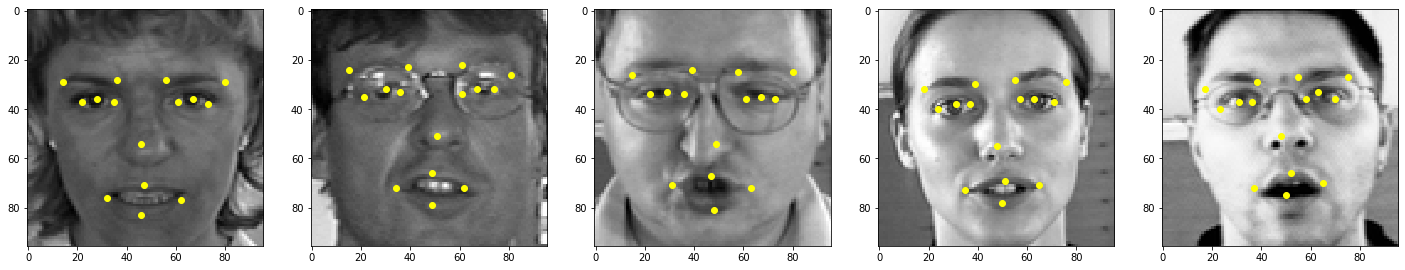

In [9]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()


In [11]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    
    return filename


ModuleNotFoundError: No module named 'google.colab'



Run this code cell. You'll see a camera preview and a "*Capture*" button. Once you take a picture, it will be saved as `photo.jpg`.


In [0]:

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



We'll read the `photo.jpg`, resize it `( 96 , 96 )` and feed it to our model. The predictions will then be plotted on the image.


You may convert the Keras model to a TensorFlow Lite model.

In [13]:

converter = tf.lite.TFLiteConverter.from_keras_model( model )
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY ]
buffer = converter.convert()
open( 'model.tflite' , 'wb' ).write( buffer )

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])
print(interpreter.get_input_details()[0]['dtype'])

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])
print(interpreter.get_output_details()[0]['dtype'])


[ 1 96 96  1]
<class 'numpy.float32'>
[ 1  1  1 30]
<class 'numpy.float32'>
